# 분류 신경망 빌딩 연습

In [ ]:
# 모형 저장 및 불러오는 코드

# model.save('cnn_model2.h5')

# from tensorflow.keras.models import load_model
# cnn_model2 = load_model('cnn_model2.h5')

# Data and libraries

일관된 결과를 위해 random seed를 0으로 고정한다.


In [1]:
import numpy as np
import tensorflow as tf

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
import keras

# version check
print(np.__version__)
print(tf.__version__)
print(keras.__version__)

1.22.4
2.9.1
2.9.0


In [3]:
# data load

from sklearn import datasets
raw_wine = datasets.load_wine()

# feature and target

In [4]:
X = raw_wine.data
y = raw_wine.target

## feature dimension 

In [5]:
print(X.shape)

(178, 13)


## target data classes

In [6]:
print(set(y))

{0, 1, 2}


## target data one-hot encoding (오류 및 해결 포함)

타깃 데이터는 범주형 데이터이기 때문에(0, 1, 2로 표현됨) 원핫인코딩을 진행하도록 한다.

In [7]:
from tensorflow.keras.utils import to_categorical

y_hot = to_categorical(y)
print(y_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

```
AlreadyExistsError: Another metric with the same name already exists.
```

해당 오류가 뜨면 keras를 하나만 설치하라는 의미라고 한다. (https://precommer.tistory.com/76

나는 가상환경을 사용하고 있는 상황이라 혹시나 해서 base에 있는 keras도 지워보고 다시 깔았지만 다시 문제가 생겼다.


```
ImportError: cannot import name 'dtensor' from 'tensorflow.compat.v2.experimental' (/Users/Angela/opt/anaconda3/envs/py3_8_5/lib/python3.8/site-packages/tensorflow/_api/v2/compat/v2/experimental/__init__.py)
```

그 다음에는 텐서플로우와 케라스 버전이 안맞는다는 이야기를 받았다. ~~젠장.~~ (https://stackoverflow.com/questions/72255562/cannot-import-name-dtensor-from-tensorflow-compat-v2-experimental)

둘다 지우고 다시 깔도록 한다. 이번 오류 덕분에 모싄뤄닝등을 할 때는 버전 체크가 더더욱이 중요하다는 것을, 까먹었었던 바보를 발견하였다.

## Training/Test Data split

In [8]:
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te = train_test_split(X, y_hot, random_state = 0)

# Building Perceptron (오류 및 해결 포함)

In [9]:
from tensorflow.keras.models import Sequential         # 신경망 생성
from tensorflow.keras.layers import Dense              # 신경망 층 추가
from tensorflow.keras.layers import BatchNormalization # 배치 정규화
from tensorflow.keras.layers import Activation         # 활성화 함수 사용

n_feat = X_tn.shape[1]              # 신경망에 사용되는 피처 개수 (현재 데이터: 13개)
n_class = len(set(y))               # 클래스 개수 (현재 데이터: 3개)
epo = 30                            # 학습횟수 30. 30단계로 학습 진행

model = Sequential()                # 초기 모형 생성.
model.add(Dense(20, input_dim = n_feat)) # add로 입력층 추가, *input_dim = 피처개수, 20은 output 차원
model.add(BatchNormalization())     # 배치 정규화
model.add(Activation('relu'))       # 활성화 함수 reLU
model.add(Dense(n_class))           # 최종 아웃풋 층. 클래스 개수인 3개로 구분되도록.
model.add(Activation('softmax'))    # 활성화 함수 softmax

2022-06-22 19:17:52.161539: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## perceptron model structure checking

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 63        
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                                 
Total params: 423
Trainable params: 383
Non-trainable params: 40
_________________________________________________________

빌딩하고 났더니 무슨 오류가 떴는데 모델 요약은 적절하게 되었다. 이를 해결하기 위해서는 

(https://stackoverflow.com/questions/66092421/how-to-rebuild-tensorflow-with-the-compiler-flags)
```
 import os
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
```

하라고 해서 해보고 진행했더니 하단처럼, 오류가 뜨지 않았다.

대신 모델 버전이 다르다. 알아서 새로 만들었나보다.

In [11]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [13]:
from tensorflow.keras.models import Sequential         # 신경망 생성
from tensorflow.keras.layers import Dense              # 신경망 층 추가
from tensorflow.keras.layers import BatchNormalization # 배치 정규화
from tensorflow.keras.layers import Activation         # 활성화 함수 사용

n_feat = X_tn.shape[1]              # 신경망에 사용되는 피처 개수 (현재 데이터: 13개)
n_class = len(set(y))               # 클래스 개수 (현재 데이터: 3개)
epo = 30                            # 학습횟수 30. 30단계로 학습 진행

model = Sequential()                # 초기 모형 생성.
model.add(Dense(20, input_dim = n_feat)) # add로 입력층 추가, *input_dim = 피처개수, 20은 output 차원
model.add(BatchNormalization())     # 배치 정규화
model.add(Activation('relu'))       # 활성화 함수 reLU
model.add(Dense(n_class))           # 최종 아웃풋 층. 클래스 개수인 3개로 구분되도록.
model.add(Activation('softmax'))    # 활성화 함수 softmax

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                280       
                                                                 
 batch_normalization_2 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 20)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 63        
                                                                 
 activation_5 (Activation)   (None, 3)                 0         
                                                                 
Total params: 423
Trainable params: 383
Non-trainable params: 40
_______________________________________________________

## model compile

In [15]:
model.compile(loss = 'categorical_crossentropy',  # 손실함수: 이진은 binary, 이상은 categorical
             optimizer = 'adam',                  # 옵티마이저와 평가 기준
             metrics = ['accuracy'])

## model learning

In [16]:
hist = model.fit(X_tn, y_tn, epochs = epo, batch_size = 5)  # batch_size: learning mini batch size at one ephoch

Epoch 1/30
27/27 [==============================] - 1s 6ms/step - loss: 1.0688 - accuracy: 0.3835
Epoch 2/30
27/27 [==============================] - 0s 3ms/step - loss: 0.8910 - accuracy: 0.6316
Epoch 3/30
27/27 [==============================] - 0s 4ms/step - loss: 0.8554 - accuracy: 0.6015
Epoch 4/30
27/27 [==============================] - 0s 3ms/step - loss: 0.7937 - accuracy: 0.6316
Epoch 5/30
27/27 [==============================] - 0s 3ms/step - loss: 0.7315 - accuracy: 0.7293
Epoch 6/30
27/27 [==============================] - 0s 3ms/step - loss: 0.7424 - accuracy: 0.6692
Epoch 7/30
27/27 [==============================] - 0s 4ms/step - loss: 0.7507 - accuracy: 0.7143
Epoch 8/30
27/27 [==============================] - 0s 5ms/step - loss: 0.6550 - accuracy: 0.8045
Epoch 9/30
27/27 [==============================] - 0s 5ms/step - loss: 0.6277 - accuracy: 0.7519
Epoch 10/30
27/27 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.8045
Epoch 11/30
27/27 [

# evaluation

In [17]:
print(model.evaluate(X_tn, y_tn)[1])
print(model.evaluate(X_te, y_te)[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.8212 - accuracy: 0.5714
0.5714285969734192
2/2 [==============================] - 0s 7ms/step - loss: 0.7784 - accuracy: 0.6444
0.644444465637207


좀... 끔찍한 결과이다.

## accuracy and loss rate

In [18]:
import numpy as np
epoch = np.arange(1, epo +1)            # x축 설정
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [19]:
accuracy = hist.history['accuracy']   # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 정확도를 알 수 있다.
print(accuracy)

[0.3834586441516876, 0.6315789222717285, 0.6015037298202515, 0.6315789222717285, 0.7293233275413513, 0.6691729426383972, 0.7142857313156128, 0.8045112490653992, 0.7518796920776367, 0.8045112490653992, 0.8120300769805908, 0.8571428656578064, 0.8345864415168762, 0.8270676732063293, 0.8796992301940918, 0.8646616339683533, 0.8571428656578064, 0.8646616339683533, 0.7744361162185669, 0.8571428656578064, 0.8496240377426147, 0.8195488452911377, 0.8571428656578064, 0.8195488452911377, 0.8721804618835449, 0.8421052694320679, 0.8646616339683533, 0.8270676732063293, 0.8270676732063293, 0.8872180581092834]


In [20]:
loss = hist.history['loss']           # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 손실정도를 알 수 있다.
print(loss)

[1.068764567375183, 0.8909791707992554, 0.855434238910675, 0.7936780452728271, 0.7315273880958557, 0.7424473762512207, 0.7506675720214844, 0.6550098657608032, 0.6277068257331848, 0.5936731696128845, 0.5996636152267456, 0.5164527893066406, 0.5092477202415466, 0.5592142939567566, 0.4995950758457184, 0.42710691690444946, 0.42207688093185425, 0.42477908730506897, 0.5746212005615234, 0.4534298777580261, 0.4397333264350891, 0.4522445499897003, 0.37329405546188354, 0.4696033000946045, 0.42441466450691223, 0.4354948103427887, 0.40682098269462585, 0.40640369057655334, 0.3955713212490082, 0.3976100981235504]


## accuracy and loss rate visualization

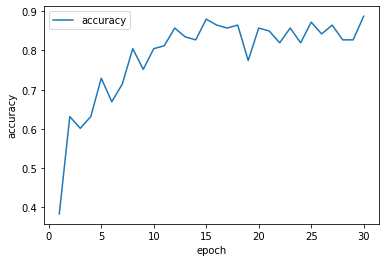

In [21]:
import matplotlib.pyplot as plt

plt.plot(epoch, accuracy, label = 'accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

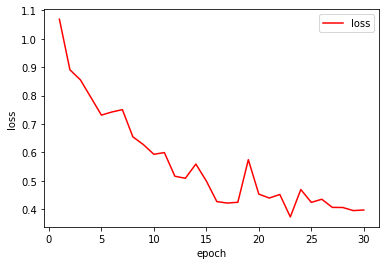

In [22]:
plt.plot(epoch, loss, 'r', label = 'loss')    # plot color = r[ed]
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# Whole code

활성화 함수를 하이퍼볼릭 탄젠트 함수로 사용하였다. 분류 문제이고 클래스가 세 가지이기 때문에 (느낌적으로...) 중간에 이 함수로 분류를 풀고 마지막에 소프트맥스 함수를 사용하는 것이 좋을 것이라 생각하여 해보았는데 실제로 정확도가 상당히 상승하였다. 테스트 데이터 대상으로 한 정확도가 0.644 에서 0.933으로 큰 폭 상승하였다고!

numpy version: 1.22.4
tensorflow version: 2.9.1
keras version: 2.9.0
-- X and target shape checking --
(178, 13)
{0, 1, 2}
-- model summary --
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20)                280       
                                                                 
 batch_normalization_5 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 activation_10 (Activation)  (None, 20)                0         
                                                                 
 dense_11 (Dense)            (None, 3)                 63        
                                                                 
 activation_11 (Activation)  (None, 3)                 0         
                                           

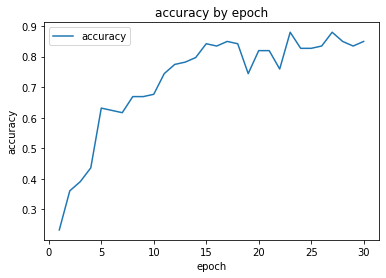

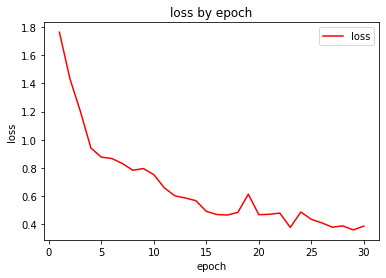

In [25]:
import numpy as np
import tensorflow as tf
import keras

np.random.seed(0)
tf.random.set_seed(0)

# version check
print("numpy version:", np.__version__)
print("tensorflow version:", tf.__version__)
print("keras version:", keras.__version__)

# data load
from sklearn import datasets
raw_wine = datasets.load_wine()

X = raw_wine.data
y = raw_wine.target

# checking the feature dimension and target
print("-- X and target shape checking --")
print(X.shape)
print(set(y))

# one-hot encoding
from tensorflow.keras.utils import to_categorical
y_hot = to_categorical(y)
# print(y_hot)

# split to training data and test data
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y_hot, random_state = 0)

# model building
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from tensorflow.keras.models import Sequential         # 신경망 생성
from tensorflow.keras.layers import Dense              # 신경망 층 추가
from tensorflow.keras.layers import BatchNormalization # 배치 정규화
from tensorflow.keras.layers import Activation         # 활성화 함수 사용

n_feat = X_tn.shape[1]              # 신경망에 사용되는 피처 개수 (현재 데이터: 13개)
n_class = len(set(y))               # 클래스 개수 (현재 데이터: 3개)
epo = 30                            # 학습횟수 30. 30단계로 학습 진행

model = Sequential()                # 초기 모형 생성.
model.add(Dense(20, input_dim = n_feat)) # add로 입력층 추가, *input_dim = 피처개수, 20은 output 차원
model.add(BatchNormalization())     # 배치 정규화
model.add(Activation('tanh'))       # 활성화 함수: 하이퍼볼릭 탄젠트
model.add(Dense(n_class))           # 최종 아웃풋 층. 클래스 개수인 3개로 구분되도록.
model.add(Activation('softmax'))    # 활성화 함수 softmax

# model checking
print("-- model summary --")
model.summary()

# compile
model.compile(loss = 'categorical_crossentropy',  # 손실함수: 이진은 binary, 이상은 categorical
             optimizer = 'adam',                  # 옵티마이저와 평가 기준
             metrics = ['accuracy'])

# learning
hist = model.fit(X_tn, y_tn, epochs = epo, batch_size = 5)  # batch_size: learning mini batch size at one ephoch

# evaluation
print("-- model evaluate with train data --")
print(model.evaluate(X_tn, y_tn)[1])
print("-- model evaluate with test data --")
print(model.evaluate(X_te, y_te)[1])

# accuracy
import numpy as np
epoch = np.arange(1, epo +1)          # aragne 함수로 x축 설정
# print(epoch)
accuracy = hist.history['accuracy']   # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 정확도를 알 수 있다.
# print(accuracy)
loss = hist.history['loss']           # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 손실정도를 알 수 있다.
# print(loss)


# visualization

import matplotlib.pyplot as plt

plt.plot(epoch, accuracy, label = 'accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title("accuracy by epoch")
plt.show()

plt.plot(epoch, loss, 'r', label = 'loss')    # plot color = r[ed]
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title("loss by epoch")
plt.show()